In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customer_data = pd.read_csv("C:\\Users\\yashc\\Desktop\\PORTFOLIO - (PROJECTS)\\Retail Fashion\\Dataset\\customer_data.csv")
product_data = pd.read_csv("C:\\Users\\yashc\\Desktop\\PORTFOLIO - (PROJECTS)\\Retail Fashion\\Dataset\\product_data.csv")
sales_data = pd.read_csv("C:\\Users\\yashc\\Desktop\\PORTFOLIO - (PROJECTS)\\Retail Fashion\\Dataset\\sales_data.csv")
store_data = pd.read_csv("C:\\Users\\yashc\\Desktop\\PORTFOLIO - (PROJECTS)\\Retail Fashion\\Dataset\\store_data.csv")

In [14]:
print("Store Data Missing Values:\n", store_data.isnull().sum(), "\n")
print('customer data missing values:\n', customer_data.isnull().sum(),'\n')
print('sales data missing values: \n' , sales_data.isnull().sum(), '\n')
print('product data missing values: \n' , product_data.isnull().sum(), '\n')

Store Data Missing Values:
 store_id         0
store_name       0
region           0
store_size_m2    0
dtype: int64 

customer data missing values:
 customer_id      0
age              0
gender           0
city             0
email          496
dtype: int64 

sales data missing values: 
 transaction_id       0
order_date           0
product_id           0
store_id             0
customer_id       1844
quantity             0
discount          2583
returned             0
dtype: int64 

product data missing values: 
 product_id      0
category        0
color         990
size            0
season          0
supplier        0
cost_price      0
list_price      0
dtype: int64 



In [17]:
customer_data['email'].fillna('Unknown', inplace=True)
sales_data['discount'].fillna(0, inplace= True)
sales_data.dropna(subset=['customer_id'], inplace = True)
product_data['color'].fillna('Unknown', inplace=True)

C:\Users\yashc\AppData\Local\Temp\ipykernel_4424\1857916556.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data['discount'].fillna(0, inplace= True)
C:\Users\yashc\AppData\Local\Temp\ipykernel_4424\1857916556.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [18]:
print("Remaining Missing Values After Cleaning:")
print(store_data.isnull().sum())
print(customer_data.isnull().sum())
print(sales_data.isnull().sum())
print(product_data.isnull().sum())

Remaining Missing Values After Cleaning:
store_id         0
store_name       0
region           0
store_size_m2    0
dtype: int64
customer_id    0
age            0
gender         0
city           0
email          0
dtype: int64
transaction_id    0
order_date        0
product_id        0
store_id          0
customer_id       0
quantity          0
discount          0
returned          0
dtype: int64
product_id    0
category      0
color         0
size          0
season        0
supplier      0
cost_price    0
list_price    0
dtype: int64


In [22]:
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'], errors = 'coerce')
sales_data['quantity'] = pd.to_numeric(sales_data['quantity'], errors='coerce')
sales_data['discount'] = pd.to_numeric(sales_data['discount'], errors='coerce')
product_data['cost_price'] = pd.to_numeric(product_data['cost_price'], errors='coerce')
product_data['list_price'] = pd.to_numeric(product_data['list_price'], errors='coerce')
store_data['store_size_m2'] = pd.to_numeric(store_data['store_size_m2'], errors='coerce')

In [23]:
print("Store Data Types:\n", store_data.dtypes, "\n")
print("Customer Data Types:\n", customer_data.dtypes, "\n")
print("Product Data Types:\n", product_data.dtypes, "\n")
print("Sales Data Types:\n", sales_data.dtypes, "\n")

Store Data Types:
 store_id         object
store_name       object
region           object
store_size_m2     int64
dtype: object 

Customer Data Types:
 customer_id    object
age             int64
gender         object
city           object
email          object
dtype: object 

Product Data Types:
 product_id     object
category       object
color          object
size           object
season         object
supplier       object
cost_price    float64
list_price    float64
dtype: object 

Sales Data Types:
 transaction_id            object
order_date        datetime64[ns]
product_id                object
store_id                  object
customer_id               object
quantity                   int64
discount                 float64
returned                   int64
dtype: object 



In [24]:
print("Duplicates before cleaning:")
print("Store:", store_data.duplicated().sum())
print('Product:', product_data.duplicated().sum())
print("Sales:", sales_data.duplicated().sum())
print("Customer:", customer_data.duplicated().sum())

Duplicates before cleaning:
Store: 0
Product: 0
Sales: 0
Customer: 0


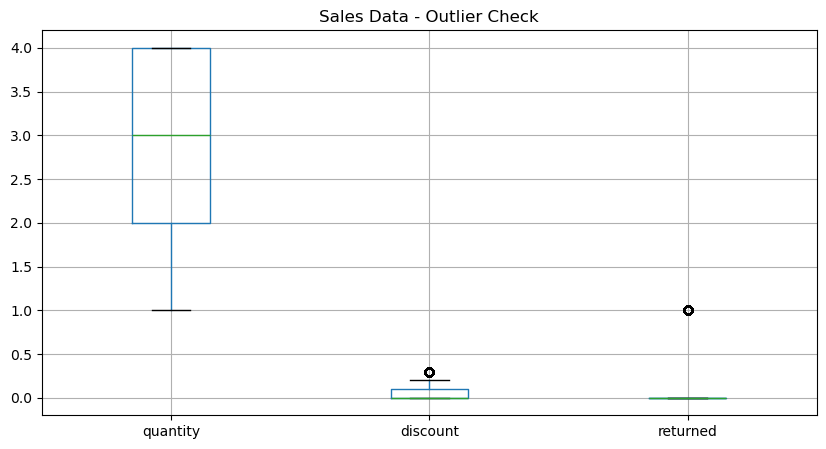

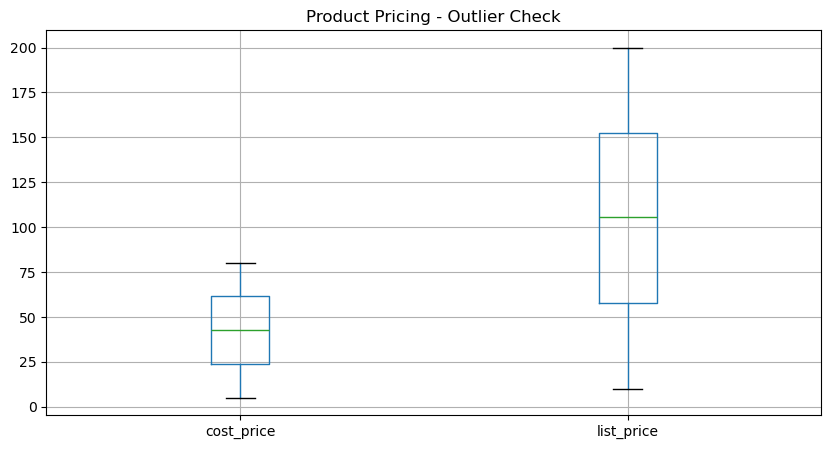

In [27]:
numeric_cols = ['quantity', 'discount', 'returned']
plt.figure(figsize=(10, 5))
sales_data[numeric_cols].boxplot()
plt.title("Sales Data - Outlier Check")
plt.show()
plt.figure(figsize=(10,5))
product_data[['cost_price', 'list_price']].boxplot()
plt.title('Product Pricing - Outlier Check')
plt.show()

In [28]:
store_data.to_csv('Cleaned_Store_Data.csv', index=False)
customer_data.to_csv('Cleaned_Customer_Data.csv', index=False)
product_data.to_csv('Cleaned_Product_Data.csv', index=False)
sales_data.to_csv('Cleaned_Sales_Data.csv', index=False)

In [31]:
sales_merged = sales_data.merge(product_data, on='product_id', how= 'left')
sales_merged = sales_merged.merge(store_data, on='store_id', how='left')

sales_merged['revenue'] = sales_merged['quantity'] * (sales_merged['list_price'] * (1 - sales_merged['discount']))
sales_merged['profit'] = (sales_merged['list_price'] - sales_merged['cost_price']) * sales_merged['quantity']

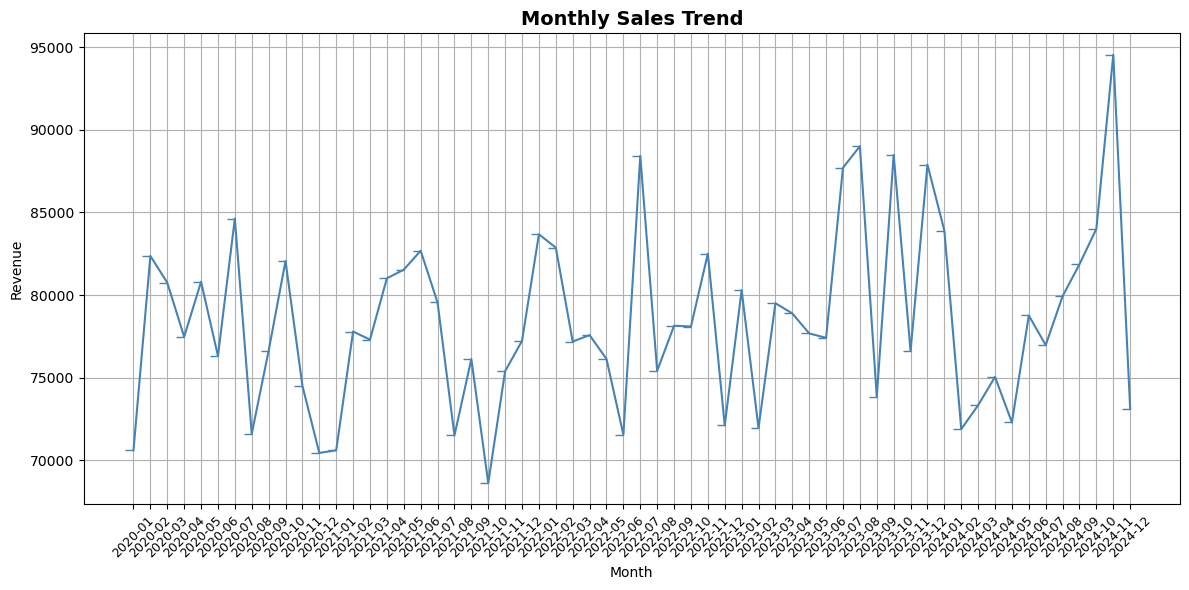

In [44]:
sales_merged['month_year'] = sales_merged['order_date'].dt.to_period('M')
monthly_sales = sales_merged.groupby('month_year')['revenue'].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['month_year'].astype(str), monthly_sales['revenue'], marker=0, color='steelblue')
plt.title('Monthly Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45, fontsize=9)
plt.tight_layout()
plt.show()

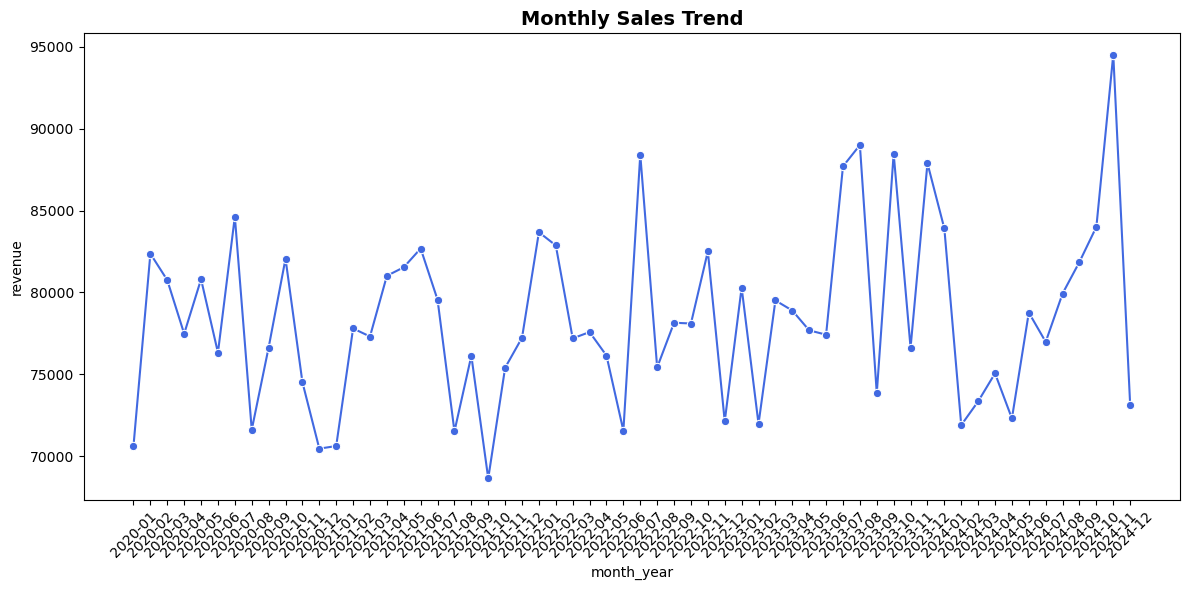

In [45]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_sales['month_year'].astype(str), y=monthly_sales['revenue'], marker='o', color='royalblue')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

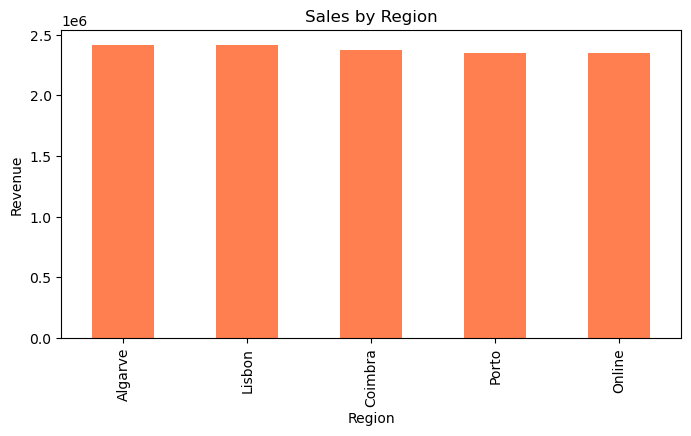

In [54]:
regional_sales = sales_merged.groupby('region')['revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
regional_sales.plot(kind='bar', color='coral')
plt.title('Sales by Region')
plt.ylabel('Revenue')
plt.xlabel('Region')
plt.show()

In [58]:
top_products_revenue = (
    sales_merged.groupby('product_id')['revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_products_revenue

product_id
P022324    3488.800
P012529    3330.300
P025493    3209.444
P046447    2952.393
P005856    2881.602
P003362    2855.364
P025747    2832.624
P029873    2806.958
P039149    2788.024
P016036    2764.656
Name: revenue, dtype: float64

In [61]:
top_products_quantity = (
    sales_merged.groupby('product_id')['quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_products_quantity

product_id
P999999    495
P031762     22
P031170     20
P022324     20
P003856     20
P007482     20
P009321     19
P043237     19
P004452     18
P014739     18
Name: quantity, dtype: int64

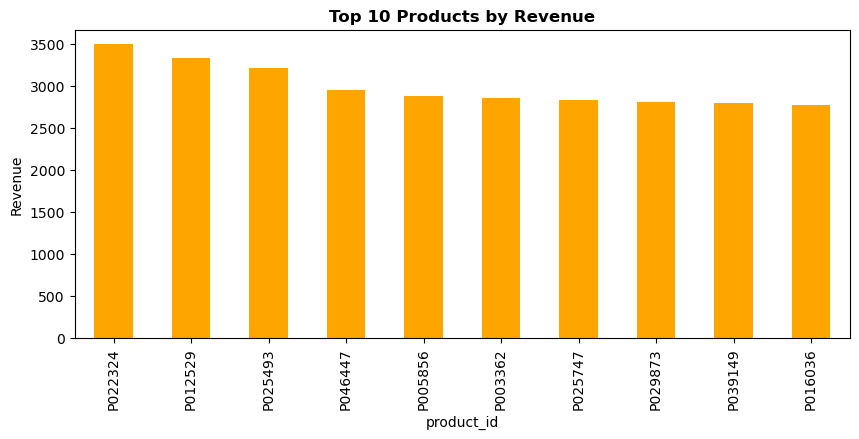

In [66]:
plt.figure(figsize=(10,4))
top_products_revenue.plot(kind='bar', color='orange')
plt.title('Top 10 Products by Revenue', fontweight='bold')
plt.ylabel('Revenue')
plt.show()

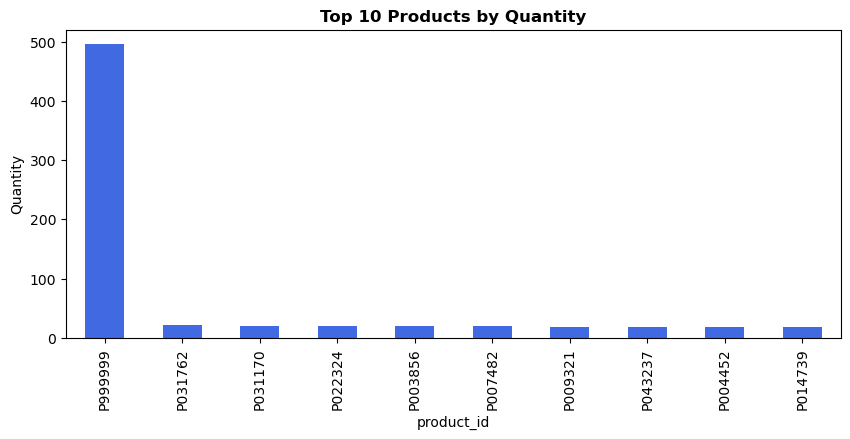

In [68]:
plt.figure(figsize=(10,4))
top_products_quantity.plot(kind='bar', color='royalblue')
plt.title('Top 10 Products by Quantity', fontweight='bold')
plt.ylabel('Quantity')
plt.show()

In [70]:
top_products_profit = (
    sales_merged.groupby('product_id')['profit']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_products_profit

product_id
P012529    3197.02
P039149    2928.00
P025493    2788.85
P022324    2728.40
P003362    2650.65
P005856    2577.60
P014253    2513.84
P028671    2477.02
P044254    2447.36
P003285    2417.61
Name: profit, dtype: float64

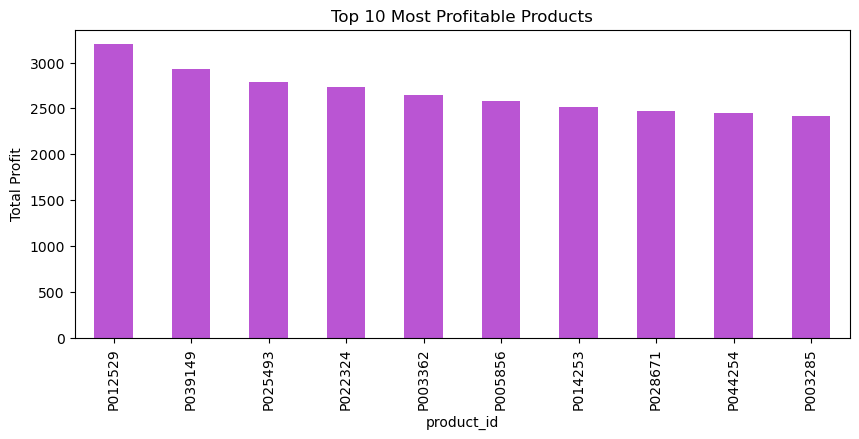

In [71]:
plt.figure(figsize=(10,4))
top_products_profit.plot(kind='bar', color='mediumorchid')
plt.title('Top 10 Most Profitable Products')
plt.ylabel('Total Profit')
plt.show()

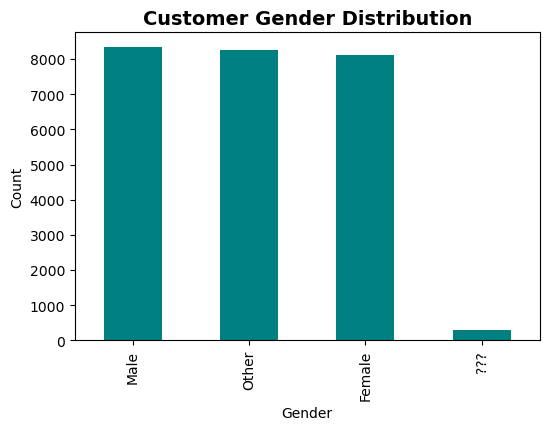

In [72]:
plt.figure(figsize=(6,4))
customer_data['gender'].value_counts().plot(kind='bar', color='teal')
plt.title('Customer Gender Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

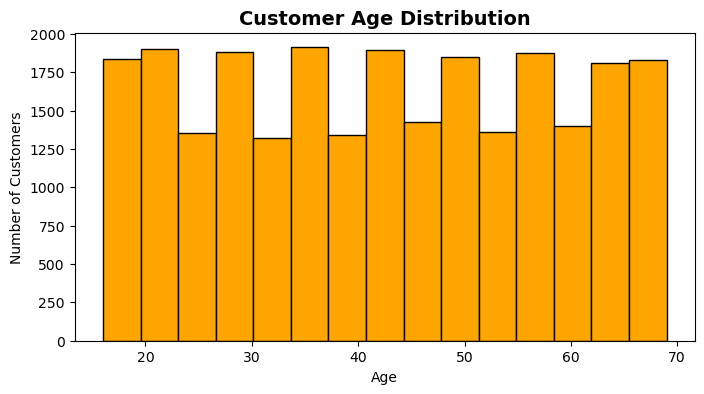

In [73]:
plt.figure(figsize=(8,4))
plt.hist(customer_data['age'], bins=15, color='orange', edgecolor='black')
plt.title('Customer Age Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

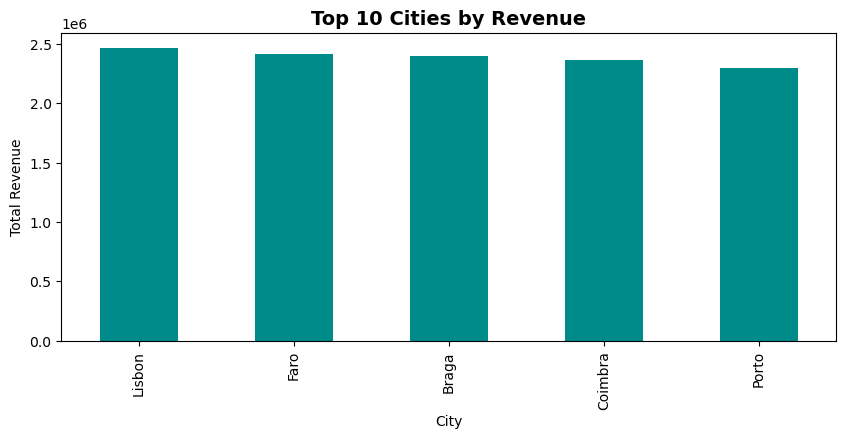

In [77]:
sales_customer = sales_merged.merge(customer_data, on='customer_id', how= 'left')
city_sales = sales_customer.groupby('city')['revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,4))
city_sales.plot(kind='bar', color= 'darkcyan')
plt.title('Top 10 Cities by Revenue', fontsize=14, fontweight='bold')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.show()

In [78]:
aov = sales_merged['revenue'].sum() / sales_merged['transaction_id'].nunique()
print(f'Average Order Value (AOV): ${aov:.2f}')

Average Order Value (AOV): $248.18


In [79]:
repeat_customers = sales_merged['customer_id'].value_counts()
repeat_rate = (repeat_customers[repeat_customers > 1].count() / repeat_customers.count()) * 100
print(f'Repeat Purchase Rate: {repeat_rate:.2f}%')

Repeat Purchase Rate: 66.78%


In [80]:
sales_merged['month'] = sales_merged['order_date'].dt.month
sales_merged['year'] = sales_merged['order_date'].dt.year

In [82]:
def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Autumn'

sales_merged['season'] = sales_merged['month'].apply(get_season)

In [83]:
monthly_sales = (
    sales_merged.groupby('month')['revenue']
    .sum()
    .sort_index()
)

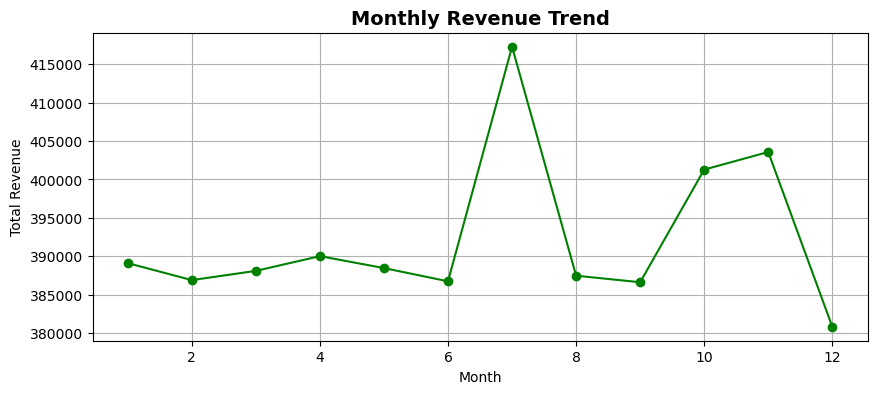

In [84]:
plt.figure(figsize=(10,4))
monthly_sales.plot(marker='o', color='green')
plt.title('Monthly Revenue Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

In [86]:
seasonal_sales = (
    sales_merged.groupby('season')['revenue']
    .sum()
    .reindex(['Winter', 'Spring', 'Summer', 'Autumn'])
)

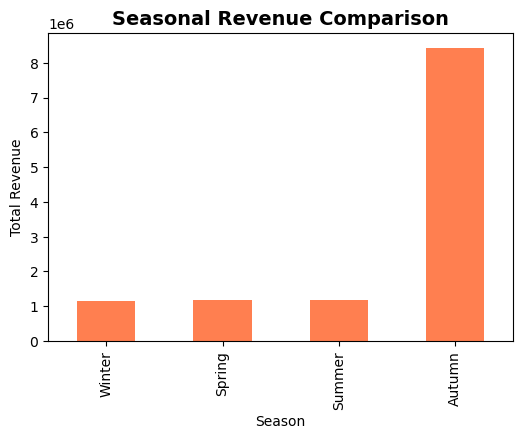

In [87]:
plt.figure(figsize=(6,4))
seasonal_sales.plot(kind='bar', color='coral')
plt.title('Seasonal Revenue Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Season')
plt.ylabel('Total Revenue')
plt.show()

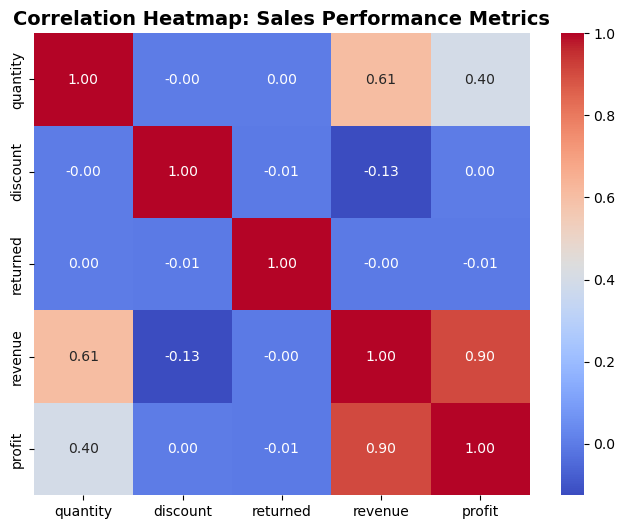

In [89]:
corr_cols = ['quantity', 'discount', 'returned', 'revenue', 'profit']
corr_matrix = sales_merged[corr_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Sales Performance Metrics', fontsize=14, fontweight='bold')
plt.show()